# CS 525 Assignment 1
Sirut Buasai, sbuasai2@wpi.edu

### Imports and Downloads

In [128]:
# libraries
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Data retrieval and processing

In [129]:
# load data from csv files
real_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [130]:
# clean real data by removing punctuations and special characters and convert string to lower case
real_data = real_data.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
real_data['text'] = real_data['text'].str.lower()
real_data.head()

,title,text,subject,date
0,As U S budget fight looms Republicans flip the...,washington reuters the head of a conservative ...,politicsNews,December 31 2017
1,U S military to accept transgender recruits on...,washington reuters transgender people will be ...,politicsNews,December 29 2017
2,Senior U S Republican senator Let Mr Mueller d...,washington reuters the special counsel investi...,politicsNews,December 31 2017
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,December 30 2017
4,Trump wants Postal Service to charge much more...,seattle washington reuters president donald tr...,politicsNews,December 29 2017


In [131]:
# clean fake data by removing punctuations and special characters and convert string to lower case
fake_data = fake_data.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
fake_data['text'] = fake_data['text'].str.lower()
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year ...,donald trump just couldn t wish all americans ...,News,December 31 2017
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,December 31 2017
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,December 30 2017
3,Trump Is So Obsessed He Even Has Obama s Name...,on christmas day donald trump announced that h...,News,December 29 2017
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,December 25 2017


## Task 1: Explore Essential Information from Text Data and Preprocessing
### Text Tokenization

In [132]:
# tokenize real texts
real_data['tokenized_text'] = real_data['text'].apply(nltk.tokenize.word_tokenize)
real_tokens = real_data['tokenized_text'].explode()
real_tokens.dropna(inplace=True)
real_tokens = real_tokens.to_list()

# tokenize fake texts
fake_data['tokenized_text'] = fake_data['text'].apply(nltk.tokenize.word_tokenize)
fake_tokens = fake_data['tokenized_text'].explode()
fake_tokens.dropna(inplace=True)
fake_tokens = fake_tokens.to_list()

# create collection of tokens from both real and fake tokens
collection_tokens = real_tokens + fake_tokens

print(f"Number of real tokens:\t{len(real_tokens)}")
print(f"Number of fake tokens:\t{len(fake_tokens)}")
print(f"Total number of tokens:\t{len(collection_tokens)}")

Number of real tokens:	8435968
Number of fake tokens:	10251160
Total number of tokens:	18687128


### Stop Word Removal

In [133]:
# remove stop words
stop_words = nltk.corpus.stopwords.words('english')
real_stop = [x for x in real_tokens if x not in stop_words]
fake_stop = [x for x in fake_tokens if x not in stop_words]
collection_stop = [x for x in collection_tokens if x not in stop_words]

print(f"Number of real tokens after stop word removal:\t{len(real_stop)}")
print(f"Number of fake tokens after stop word removal:\t{len(fake_stop)}")
print(f"Total number of tokens after stop word removal:\t{len(collection_stop)}")

Number of real tokens after stop word removal:	5037632
Number of fake tokens after stop word removal:	5724253
Total number of tokens after stop word removal:	10761885


### Text Lemminization

In [134]:
# lemmatize tokens
lemmatizer = nltk.stem.WordNetLemmatizer()
real_lemm = [lemmatizer.lemmatize(x) for x in real_stop]
fake_lemm = [lemmatizer.lemmatize(x) for x in fake_stop]
collection_lemm = [lemmatizer.lemmatize(x) for x in collection_stop]

print(f"Number of real tokens after lemminization:\t{len(real_stop)}")
print(f"Number of fake tokens after lemminization:\t{len(fake_stop)}")
print(f"Total number of tokens after lemminization:\t{len(collection_stop)}")

Number of real tokens after lemminization:	5037632
Number of fake tokens after lemminization:	5724253
Total number of tokens after lemminization:	10761885


### Calculate Top 100 Common Words and WordCloud Analysis

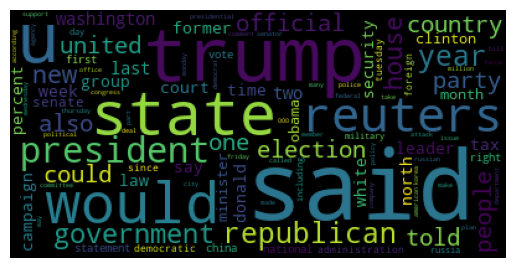

In [135]:
# retrieve top 100 most common words for real data
real_freq = nltk.FreqDist(real_lemm).most_common(100)

# download tables to excel spreadsheet
real_df = pd.DataFrame(data=dict(real_freq), index=[0])
real_df = (real_df.T)
real_df.to_excel('real_freq.xlsx')

# create wordcloud for analysis
real_wordcloud = WordCloud().generate_from_frequencies(dict(real_freq))
plt.imshow(real_wordcloud)
plt.axis('off')
plt.show()

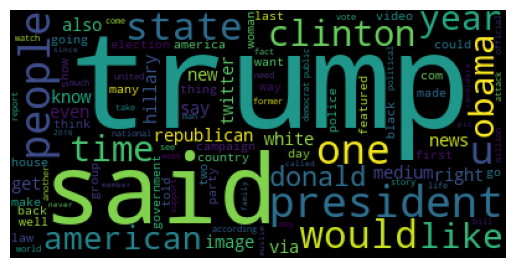

In [136]:
# retrieve top 100 most common words for fake data
fake_freq = nltk.FreqDist(fake_lemm).most_common(100)

# download tables to excel spreadsheet
fake_df = pd.DataFrame(data=dict(fake_freq), index=[0])
fake_df = (fake_df.T)
fake_df.to_excel('fake_freq.xlsx')

# create wordcloud for analysis
fake_wordcloud = WordCloud().generate_from_frequencies(dict(fake_freq))
plt.imshow(fake_wordcloud)
plt.axis('off')
plt.show()

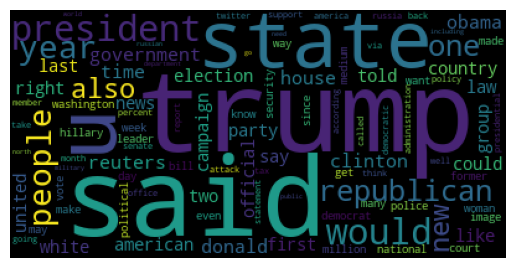

In [137]:
# retrieve top 100 most common words for real data
collection_freq = nltk.FreqDist(collection_lemm).most_common(100)

# download tables to excel spreadsheet
collection_df = pd.DataFrame(data=dict(collection_freq), index=[0])
collection_df = (collection_df.T)
collection_df.to_excel('collection_freq.xlsx')

# create wordcloud for analysis
collection_wordcloud = WordCloud().generate_from_frequencies(dict(collection_freq))
plt.imshow(collection_wordcloud)
plt.axis('off')
plt.show()

## Task 2: Build Machine Learning Model

In [138]:
# create labels for real and fake data
real_data['label'] = 1
fake_data['label'] = 0

# extract text and label
real_raw = real_data[['text','tokenized_text', 'label']]
fake_raw = fake_data[['text','tokenized_text', 'label']]

# combine the real and fake data
data_raw = pd.concat([real_raw, fake_raw])
data_raw = data_raw.sample(frac=1).reset_index(drop=True)
data_raw.head()

,text,tokenized_text,label
0,nairobi reuters south sudan is hiking fees for...,"[nairobi, reuters, south, sudan, is, hiking, f...",1
1,a new report from the new york times reveals t...,"[a, new, report, from, the, new, york, times, ...",0
2,khartoum reuters sudanese authorities believe ...,"[khartoum, reuters, sudanese, authorities, bel...",1
3,about 14 000 genesee county voters were mailed...,"[about, 14, 000, genesee, county, voters, were...",0
4,maybe being a racist bigot isn t good for busi...,"[maybe, being, a, racist, bigot, isn, t, good,...",0


### Create Training Testing Split

In [139]:
# split data into training and testing set with 70-30 split ratio
train_x, test_x, train_y, test_y = train_test_split(data_raw['text'], data_raw['label'], test_size=0.3)
train_x.head()

24217    it s somewhat terrifying listening to how some...
21572    40 of americans have given up looking for work...
1425     a sign on the door of a kewaskum dairy queen c...
15778    the president who has thumbed his nose at our ...
221      in perhaps the clearest example of the small b...
Name: text, dtype: object

### TF-IDF Feature Set

In [140]:
# create TF-IDF feature set
tfidf_vect = TfidfVectorizer()

tfidf_train_x = tfidf_vect.fit_transform(train_x)
tfidf_test_x = tfidf_vect.transform(test_x)

#### Logistic Regression on TF-IDF Feature Set

In [141]:
# perform logistic regresstion model on TF-IDF feature
tfidf_log = LogisticRegression(solver='liblinear')

# train model on training set
tfidf_log.fit(tfidf_train_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9848437983297247
Recall score:		0.9862165092148056
Accuracy score:		0.9861172976985895


#### Multinomial Naive Bayes on TF-IDF Feature Set

In [142]:
# perform multinomial naive bayes model on TF-IDF feature
tfidf_mnb = MultinomialNB()

# train model on training set
tfidf_mnb.fit(tfidf_train_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.946343779677113
Recall score:		0.9259718135356977
Accuracy score:		0.9393466963622865


### Bag of Words Feature Set

In [143]:
# create Bag of Words feature set
bow_vect = CountVectorizer()

bow_train_x = bow_vect.fit_transform(train_x)
bow_test_x = bow_vect.transform(test_x)

#### Logistic Regression on Bag of Words Feature Set

In [144]:
# perform logistic regresstion model on Bag of Words feature
bow_log = LogisticRegression(solver='liblinear')

# train model on training set
bow_log.fit(bow_train_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9975186104218362
Recall score:		0.9961282329255072
Accuracy score:		0.9969561989606534


#### Multinomial Naive Bayes on Bag of Words Feature Set

In [145]:
# perform logistic regresstion model on Bag of Words feature
bow_mnb = MultinomialNB()

# train model on training set
bow_mnb.fit(bow_train_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9510543327689703
Recall score:		0.9569459501316401
Accuracy score:		0.9557535263548627


### Confusion Matrix on Top 2 Models
#### Rank 1: Logistic Regression on Bag of Words Feature Set

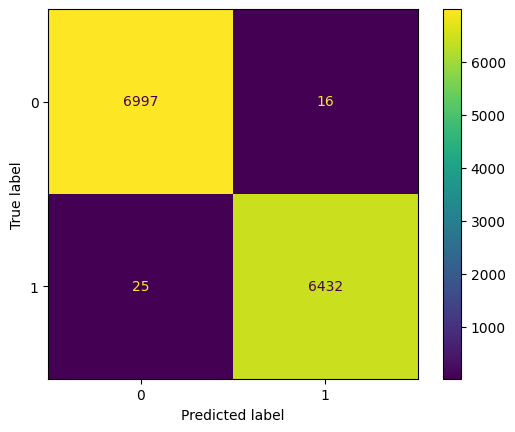

In [146]:
ConfusionMatrixDisplay.from_estimator(bow_log, bow_test_x, test_y)

#### Rank 2: Logistic Regression on TF-IDF Feature Set

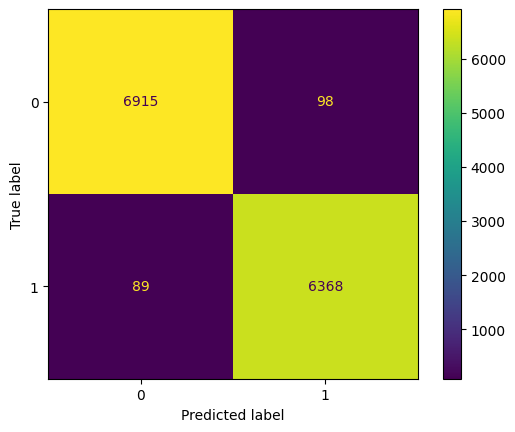

In [147]:
ConfusionMatrixDisplay.from_estimator(tfidf_log, tfidf_test_x, test_y)

## Task 3: Enhanced NLP Features

In [148]:
# reuse dataframe from task 2 that includes both real and fake data
data_raw.head()

,text,tokenized_text,label
0,nairobi reuters south sudan is hiking fees for...,"[nairobi, reuters, south, sudan, is, hiking, f...",1
1,a new report from the new york times reveals t...,"[a, new, report, from, the, new, york, times, ...",0
2,khartoum reuters sudanese authorities believe ...,"[khartoum, reuters, sudanese, authorities, bel...",1
3,about 14 000 genesee county voters were mailed...,"[about, 14, 000, genesee, county, voters, were...",0
4,maybe being a racist bigot isn t good for busi...,"[maybe, being, a, racist, bigot, isn, t, good,...",0


### Stop Word Removal

In [149]:
# remove stop words
stop_words = nltk.corpus.stopwords.words('english')
data_raw['stop_removed_text'] = data_raw['tokenized_text'].apply(lambda sentence: ' '.join([word for word in sentence if word not in stop_words]))
data_raw.head()

,text,tokenized_text,label,stop_removed_text
0,nairobi reuters south sudan is hiking fees for...,"[nairobi, reuters, south, sudan, is, hiking, f...",1,nairobi reuters south sudan hiking fees humani...
1,a new report from the new york times reveals t...,"[a, new, report, from, the, new, york, times, ...",0,new report new york times reveals trump renewe...
2,khartoum reuters sudanese authorities believe ...,"[khartoum, reuters, sudanese, authorities, bel...",1,khartoum reuters sudanese authorities believe ...
3,about 14 000 genesee county voters were mailed...,"[about, 14, 000, genesee, county, voters, were...",0,14 000 genesee county voters mailed second abs...
4,maybe being a racist bigot isn t good for busi...,"[maybe, being, a, racist, bigot, isn, t, good,...",0,maybe racist bigot good business donald trump ...


### POS Tagging

In [150]:
# POS tag the tokenized text without stop words
data_raw['pos_tagged_text'] = nltk.pos_tag_sents(data_raw['tokenized_text'])
data_raw.head()

,text,tokenized_text,label,stop_removed_text,pos_tagged_text
0,nairobi reuters south sudan is hiking fees for...,"[nairobi, reuters, south, sudan, is, hiking, f...",1,nairobi reuters south sudan hiking fees humani...,"[(nairobi, JJ), (reuters, NNS), (south, JJ), (..."
1,a new report from the new york times reveals t...,"[a, new, report, from, the, new, york, times, ...",0,new report new york times reveals trump renewe...,"[(a, DT), (new, JJ), (report, NN), (from, IN),..."
2,khartoum reuters sudanese authorities believe ...,"[khartoum, reuters, sudanese, authorities, bel...",1,khartoum reuters sudanese authorities believe ...,"[(khartoum, NN), (reuters, NNS), (sudanese, JJ..."
3,about 14 000 genesee county voters were mailed...,"[about, 14, 000, genesee, county, voters, were...",0,14 000 genesee county voters mailed second abs...,"[(about, RB), (14, CD), (000, CD), (genesee, N..."
4,maybe being a racist bigot isn t good for busi...,"[maybe, being, a, racist, bigot, isn, t, good,...",0,maybe racist bigot good business donald trump ...,"[(maybe, RB), (being, VBG), (a, DT), (racist, ..."


In [151]:
# list of POS tags from https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
# 3 filters given the frequency of nouns in fake news and verbs in real news
nouns = ['NN', 'NNS', 'NNP', 'NNPS']
verbs = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VPZ']
nouns_verbs = nouns + verbs

# apply filters to the data
data_raw['nouns'] = data_raw['pos_tagged_text'].apply(lambda pair: ' '.join([word for word, tag in pair if tag in nouns]))
data_raw['verbs'] = data_raw['pos_tagged_text'].apply(lambda pair: ' '.join([word for word, tag in pair if tag in verbs]))
data_raw['nouns_verbs'] = data_raw['pos_tagged_text'].apply(lambda pair: ' '.join([word for word, tag in pair if tag in nouns_verbs]))
data_raw.head()

,text,tokenized_text,label,stop_removed_text,pos_tagged_text,nouns,verbs,nouns_verbs
0,nairobi reuters south sudan is hiking fees for...,"[nairobi, reuters, south, sudan, is, hiking, f...",1,nairobi reuters south sudan hiking fees humani...,"[(nairobi, JJ), (reuters, NNS), (south, JJ), (...",reuters sudan fees humanitarians families oil ...,hiking blocking reaching help avert told annou...,reuters sudan hiking fees humanitarians blocki...
1,a new report from the new york times reveals t...,"[a, new, report, from, the, new, york, times, ...",0,new report new york times reveals trump renewe...,"[(a, DT), (new, JJ), (report, NN), (from, IN),...",report york times trump trademarks russia clai...,reveals renewed have are left expand sworn hav...,report york times reveals trump renewed tradem...
2,khartoum reuters sudanese authorities believe ...,"[khartoum, reuters, sudanese, authorities, bel...",1,khartoum reuters sudanese authorities believe ...,"[(khartoum, NN), (reuters, NNS), (sudanese, JJ...",khartoum reuters authorities gang abduction wo...,believe disappeared troubled have intensified ...,khartoum reuters authorities believe gang abdu...
3,about 14 000 genesee county voters were mailed...,"[about, 14, 000, genesee, county, voters, were...",0,14 000 genesee county voters mailed second abs...,"[(about, RB), (14, CD), (000, CD), (genesee, N...",genesee voters absentee ballot month officials...,were mailed discovered made voting ordered pro...,genesee voters were mailed absentee ballot mon...
4,maybe being a racist bigot isn t good for busi...,"[maybe, being, a, racist, bigot, isn, t, good,...",0,maybe racist bigot good business donald trump ...,"[(maybe, RB), (being, VBG), (a, DT), (racist, ...",racist bigot t business trump power ranks day ...,being being taking have plummeted used was mad...,being racist bigot t business trump power rank...


### Create Training Testing Split

In [152]:
# split data into training and testing set with 70-30 split ratio
train_x, test_x, train_y, test_y = train_test_split(data_raw[['nouns', 'verbs', 'nouns_verbs']], data_raw['label'], test_size=0.3)
train_x.head()

,nouns,verbs,nouns_verbs
36860,washington reuters s pick ambassador condemnat...,donald echoed pledged push broke including sec...,washington reuters donald s pick ambassador ec...
1194,reuters government decree friday firms base ca...,spain issue making transfer said deal declarin...,reuters spain government issue decree friday m...
43748,paris reuters finalist simona halep set wobble...,survived reach surrendered trail delved subdue...,paris reuters finalist simona halep survived s...
17587,reuters china states communication meeting pre...,beijing are arranging told visiting tillerson ...,beijing reuters china states are communication...
30292,bill guests opportunity bill time failings ter...,took show delight was caribou began continuing...,bill guests took opportunity bill show time de...


### TF-IDF Feature Set (Noun, Verb, Noun+Verb)

In [153]:
# create TF-IDF feature set
tfidf_vect = TfidfVectorizer()

# nouns
tfidf_train_nouns_x = tfidf_vect.fit_transform(train_x['nouns'])
tfidf_test_nouns_x = tfidf_vect.transform(test_x['nouns'])

# verbs
tfidf_train_verbs_x = tfidf_vect.fit_transform(train_x['verbs'])
tfidf_test_verbs_x = tfidf_vect.transform(test_x['verbs'])

# nouns_verbs
tfidf_train_nouns_verbs_x = tfidf_vect.fit_transform(train_x['nouns_verbs'])
tfidf_test_nouns_verbs_x = tfidf_vect.transform(test_x['nouns_verbs'])

#### Logistic Regression on TF-IDF Noun Feature Set

In [154]:
# perform logistic regresstion model on TF-IDF feature
tfidf_log = LogisticRegression(solver='liblinear')

# train model on training set
tfidf_log.fit(tfidf_train_nouns_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9758700696055684
Recall score:		0.9748145859085291
Accuracy score:		0.9763177431328879


#### Logistic Regression on TF-IDF Verb Feature Set

In [155]:
# train model on training set
tfidf_log.fit(tfidf_train_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9471243042671614
Recall score:		0.9465389369592089
Accuracy score:		0.9489235337787676


#### Logistic Regression on TF-IDF Noun+Verb Feature Set

In [156]:
# train model on training set
tfidf_log.fit(tfidf_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9801538461538462
Recall score:		0.9843943139678616
Accuracy score:		0.9829250185597624


#### Multinomial Naive Bayes on TF-IDF Noun Feature Set

In [157]:
# perform multinomial naive bayes model on TF-IDF feature
tfidf_mnb = MultinomialNB()

# train model on training set
tfidf_mnb.fit(tfidf_train_nouns_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9239537788881949
Recall score:		0.9142459826946848
Accuracy score:		0.9226429101707498


#### Multinomial Naive Bayes on TF-IDF Verb Feature Set

In [158]:
# train model on training set
tfidf_mnb.fit(tfidf_train_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9267684636958554
Recall score:		0.919035846724351
Accuracy score:		0.9262063845582776


#### Multinomial Naive Bayes on TF-IDF Noun+Verb Feature Set

In [159]:
# train model on training set
tfidf_mnb.fit(tfidf_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9352112676056338
Recall score:		0.92336217552534
Accuracy score:		0.9324424647364514


### Bag of Words Feature Set (Noun, Verb, Noun+Verb)

In [160]:
# create TF-IDF feature set
bow_vect = CountVectorizer()

# nouns
bow_train_nouns_x = bow_vect.fit_transform(train_x['nouns'])
bow_test_nouns_x = bow_vect.transform(test_x['nouns'])

# verbs
bow_train_verbs_x = bow_vect.fit_transform(train_x['verbs'])
bow_test_verbs_x = bow_vect.transform(test_x['verbs'])

# nouns_verbs
bow_train_nouns_verbs_x = bow_vect.fit_transform(train_x['nouns_verbs'])
bow_test_nouns_verbs_x = bow_vect.transform(test_x['nouns_verbs'])

#### Logistic Regression on Bag of Words Noun Feature Set

In [161]:
# perform logistic regresstion model on TF-IDF feature
bow_log = LogisticRegression(solver='liblinear')

# train model on training set
bow_log.fit(bow_train_nouns_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9858607830950901
Recall score:		0.9803770086526576
Accuracy score:		0.9838158871566444


#### Logistic Regression on Bag of Words Verb Feature Set

In [162]:
# train model on training set
bow_log.fit(bow_train_verbs_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9614117647058823
Recall score:		0.9470024721878862
Accuracy score:		0.9562731997030438


#### Logistic Regression on Bag of Words Noun+Verb Feature Set

In [163]:
# train model on training set
bow_log.fit(bow_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9894524585078331
Recall score:		0.9856304079110012
Accuracy score:		0.9880475129918337


#### Multinomial Naive Bayes on Bag of Words Noun Feature Set

In [164]:
# perform multinomial naive bayes model on TF-IDF feature
bow_mnb = MultinomialNB()

# train model on training set
bow_mnb.fit(bow_train_nouns_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9336221568930837
Recall score:		0.9323238566131026
Accuracy score:		0.9356347438752785


#### Multinomial Naive Bayes on Bag of Words Verb Feature Set

In [165]:
# train model on training set
bow_mnb.fit(bow_train_verbs_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9298881837413115
Recall score:		0.9508652657601978
Accuracy score:		0.9419450631031923


#### Multinomial Naive Bayes on Bag of Words Noun+Verb Feature Set

In [166]:
# train model on training set
bow_mnb.fit(bow_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9419753086419753
Recall score:		0.9431396786155748
Accuracy score:		0.9447661469933185
